## 6장 9절 나이브베이즈(Naive Bayes) 분류

### scikit-learn의 GaussianNB

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_sky = pd.read_csv('./data/Skyserver.csv')
df_sky

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229


In [3]:
df_sky.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [4]:
df_sky['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

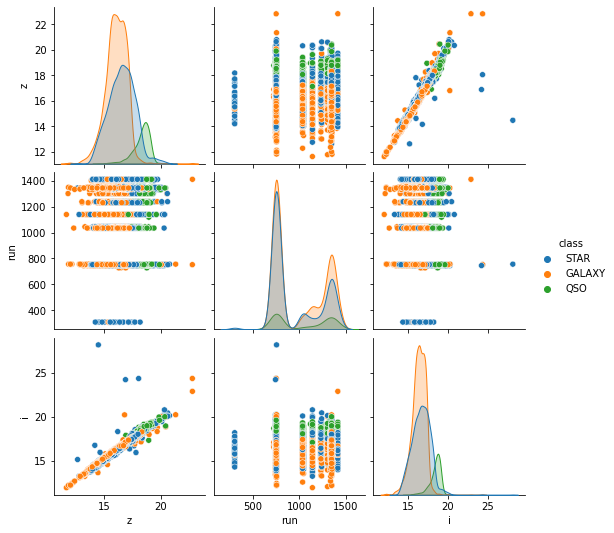

In [8]:
import seaborn as sns
sns.pairplot(hue='class', data=df_sky.loc[:, ['z', 'run', 'i','class']])

In [9]:
df_X = df_sky.drop(columns='class')
df_Y = df_sky['class']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, train_size=0.7, random_state=1, stratify=df_Y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 17) (3000, 17) (7000,) (3000,)


In [15]:
from sklearn.naive_bayes import GaussianNB

gNB = GaussianNB()
pred = gNB.fit(X_train, y_train).predict(X_test)
print('Accuracy score: ', gNB.score(X_test, y_test))

Accuracy score:  0.799


In [18]:
gNB.predict_proba(X_test)[[0, 13, 68]]

array([[8.26737014e-01, 4.43137039e-02, 1.28949282e-01],
       [5.39851854e-05, 9.64092748e-02, 9.03536740e-01],
       [8.32868012e-01, 4.48282737e-02, 1.22303715e-01]])

In [19]:
gNB.predict(X_test)[[0, 13, 68]]


array(['GALAXY', 'STAR', 'GALAXY'], dtype='<U6')

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_true = y_test, y_pred=pred))

              precision    recall  f1-score   support

      GALAXY       0.74      0.97      0.84      1499
         QSO       0.00      0.00      0.00       255
        STAR       0.91      0.75      0.83      1246

    accuracy                           0.80      3000
   macro avg       0.55      0.58      0.56      3000
weighted avg       0.75      0.80      0.76      3000



C:\Users\djimm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\djimm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\djimm\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### scikit-learn의 BernoulliNB

In [29]:
df_spam = pd.read_csv('./data/spam.csv')
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [30]:
df_spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will ? b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [23]:
df_spam.isna().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [31]:
df_spam=df_spam.loc[:, ["v1", 'v2']]
df_spam

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ? b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [27]:
df_spam['v1'].unique()

array(['ham', 'spam'], dtype=object)

In [32]:
df_spam['label'] = np.where(df_spam['v1']=='spam', 1, 0)
df_spam

,v1,v2,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ? b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [33]:
df_X = df_spam['v2']
df_Y = df_spam['label']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, stratify=df_Y, train_size=0.7, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3900,) (1672,) (3900,) (1672,)


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
cv =CountVectorizer(binary=True)
X_traincv = cv.fit_transform(X_train)
X_traincv.shape

(3900, 7175)

In [37]:
enc_input = X_traincv.toarray()
enc_input

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
print(cv.inverse_transform(enc_input[[0]]))

[array(['couple', 'down', 'give', 'me', 'minutes', 'my', 'sure', 'to',
       'track', 'wallet', 'yeah'], dtype='<U34')]


In [39]:
print(cv.get_feature_names()[1000:1010], end='')

['at', 'ate', 'athletic', 'athome', 'atlanta', 'atlast', 'atm', 'attach', 'attached', 'attack']

C:\Users\djimm\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [40]:
print(cv.get_feature_names(), end='')

['00', '000', '0089', '01223585236', '01223585334', '0125698789', '02', '0207', '02085076972', '021', '03', '04', '0430', '05', '050703', '0578', '06', '07046744435', '07090298926', '07099833605', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07781482378', '07786200117', '077xxx', '07808247860', '07821230901', '07880867867', '07946746291', '07973788240', '07xxxxxxxxx', '08', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986906', '08006344447', '0808', '08081263000', '08081560665', '0825', '083', '08448714184', '0845', '08452810073', '08452810075over18', '0870', '08700435505150p', '08700469649', '08700621170150p', '08701213186', '08701237397', '08701417012', '08701417012150p', '087016248', '08701752560', '087018728737', '0870241182716', '08702840625', '08704439680', '08704439680ts', '08706091795', '0870737910216yrs', '08707500020', '08707509020', '087075333101

In [41]:
from sklearn.naive_bayes import BernoulliNB
bNB = BernoulliNB()
bNB.fit(X_traincv, y_train)

BernoulliNB()

In [42]:
X_testcv = cv.transform(X_test)
pred = bNB.predict(X_testcv)

In [46]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_true = y_test, y_pred=pred)
print('Accuracy score: ', round(acc*100, 3), "%")

Accuracy score:  97.548 %


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1448
           1       0.99      0.82      0.90       224

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672

